### Homework 2 Problems

In [230]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#### Problem 1

In [231]:
datasite='http://burro.case.edu/Academics/Astr222/HW/HW2/'
datafile='gc.dat'

In [232]:
glob_clusters=ascii.read(datasite+datafile,header_start=-2,data_start=0)
print(glob_clusters.colnames)

['l', 'b', 'r', 'feh', 'vr']


In [233]:
#define each of the columns
L = glob_clusters['l']
B = glob_clusters['b']
R = glob_clusters['r']
feh = glob_clusters['feh']
vr = glob_clusters['vr']

In [234]:
#Convert to cartisian coordinates
glob_clusters['X'] = R * np.cos(np.deg2rad(L)) * np.cos(np.deg2rad(B))
X = glob_clusters['X']
glob_clusters['Y'] = R * np.sin(np.deg2rad(L)) * np.cos(np.deg2rad(B))
Y = glob_clusters['Y']
glob_clusters['Z'] = R * np.sin(np.deg2rad(B))
Z = glob_clusters['Z']

In [235]:
MP = (feh < -0.8) & (feh != -999)
MR = (feh > -0.8) & (feh != -999)

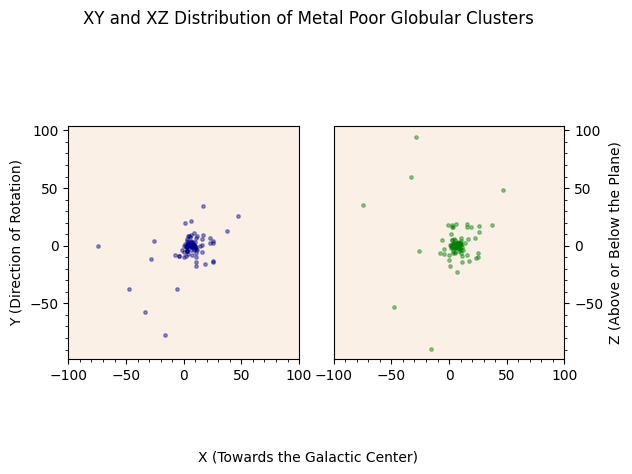

In [236]:
fig , (ax, ax2) = plt.subplots(1,2,sharey= True)

ax.scatter(X[MP], Y[MP], s = 6, color = 'darkblue', alpha = .4, label = 'XY Distribution')
ax.set_ylabel('Y (Direction of Rotation)')


ax2.scatter(X[MP], Z[MP], s = 6, color = 'green', alpha = .4, label = 'XZ Distribution')
# Move the right spine to the left
ax2.spines['right'].set_position(('outward', 0))
# Set the right y-axis to be visible
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
#Labeling plots
ax2.set_ylabel('Z (Above or Below the Plane)')


ax.set_xlim(-100,100)
ax.set_aspect('equal')
ax.set_facecolor("linen")
ax.minorticks_on()

ax2.set_xlim(-100,100)
ax2.set_facecolor("linen")
ax2.minorticks_on()
ax2.set_aspect('equal')

plt.subplots_adjust(wspace=.15)
plt.suptitle("XY and XZ Distribution of Metal Poor Globular Clusters")
fig.text(0.5, 0.04, 'X (Towards the Galactic Center)', ha='center')

plt.show()

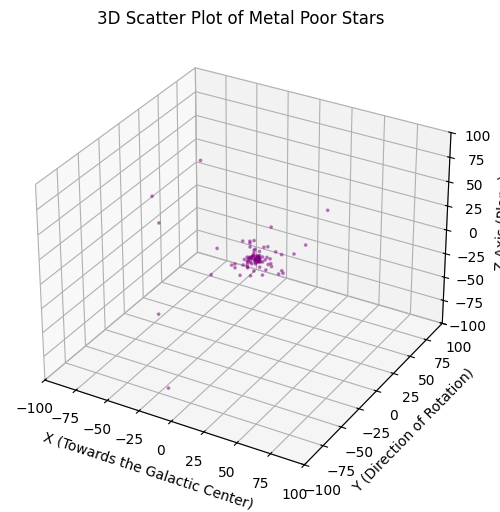

In [237]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(X[MP], Y[MP], Z[MP], c='purple', marker='o', s = 3, alpha = .4)
#ax.scatter(X[MR], Y[MR], Z[MR], c='blue', marker='o', s = 3, alpha= .8)

ax.set_xlabel('X (Towards the Galactic Center)')
ax.set_ylabel('Y (Direction of Rotation)')
ax.set_zlabel('Z Axis (Plane)')
ax.set_title('3D Scatter Plot of Metal Poor Stars')

ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_zlim(-100,100)

# Display the plot
plt.show()

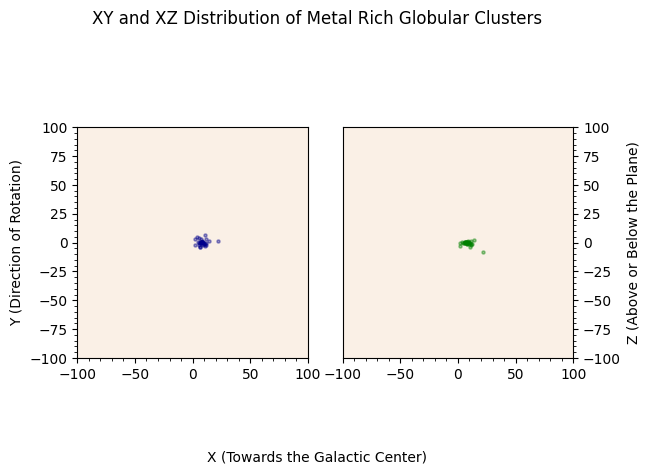

In [238]:
fig , (ax, ax2) = plt.subplots(1,2,sharey= True)

ax.scatter(X[MR], Y[MR], s = 5, color = 'darkblue', alpha = .4, label = 'XY Distribution')
ax.set_ylabel('Y (Direction of Rotation)')



ax2.scatter(X[MR], Z[MR], s = 5, color = 'green', alpha = .4, label = 'XZ Distribution')

# Move the right spine to the left
ax2.spines['right'].set_position(('outward', 0))
# Set the right y-axis to be visible
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
#Labeling plots
ax2.set_ylabel('Z (Above or Below the Plane)')

ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_aspect('equal')
ax.set_facecolor("linen")
ax.minorticks_on()

ax2.set_xlim(-100,100)
ax2.set_ylim(-100,100)
ax2.set_facecolor("linen")
ax2.minorticks_on()
ax2.set_aspect('equal')

plt.subplots_adjust(wspace=.15)
plt.suptitle("XY and XZ Distribution of Metal Rich Globular Clusters")
fig.text(0.5, 0.04, 'X (Towards the Galactic Center)', ha='center')

plt.show()

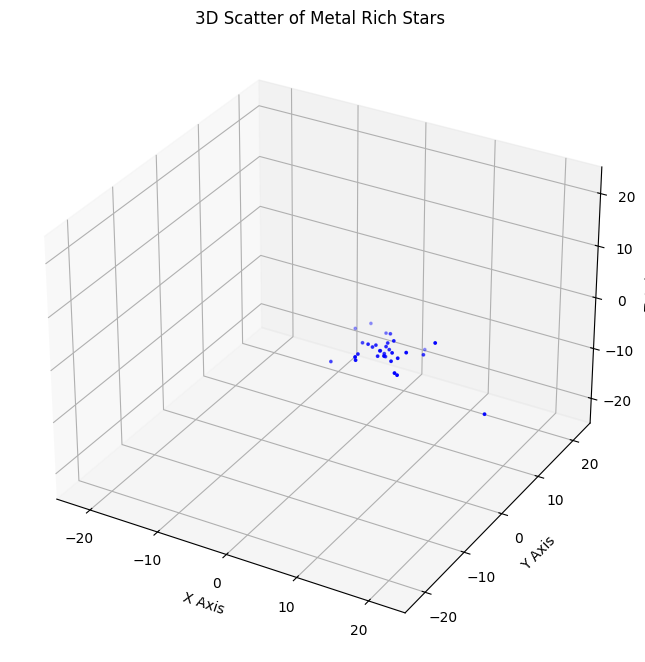

In [239]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(X[MR], Y[MR], Z[MR], c='blue', marker='o', s = 3) 

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Scatter of Metal Rich Stars')

ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
ax.set_zlim(-25,25)

# Display the plot
plt.show()

In [240]:
#Calculating the center of the metal poor and metal rich clusters

mp_x_m = np.mean(X[MP])
mp_y_m = np.mean(Y[MP])
mp_z_m = np.mean(Z[MP])

print("The center of the metal poor cluster is ({:.2f},{:.2f},{:.2f})".format(mp_x_m,mp_y_m,mp_z_m))

mr_x_m = np.mean(X[MR])
mr_y_m = np.mean(Y[MR])
mr_z_m = np.mean(Z[MR])

print("The center of the metal rich cluster is ({:.2f},{:.2f},{:.2f})".format(mr_x_m,mr_y_m,mr_z_m))

The center of the metal poor cluster is (5.58,-1.71,1.52)
The center of the metal rich cluster is (8.25,0.22,-0.52)


In [241]:
print("The distance from the Sun to the Galactic Center is {}".format(np.sqrt(mr_x_m**2 + mr_y_m**2 + mr_z_m**2)))

The distance from the Sun to the Galactic Center is 8.26684812285354


Which of the clusters do you feel is more accurate?

I would assume that the metal rich cluster is more accurate. The metal rich cluster is more tightly clustered than the metal rich cluster which means less error from data points that are "outliers."

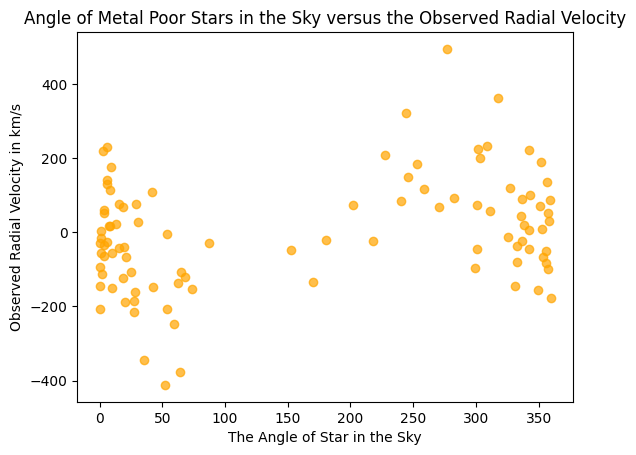

In [242]:
v_mp = (feh < -0.8) & (feh != -999) & (vr != -999)
l_mp = (feh < -0.8) & (feh != -999) & (vr != -999)

plt.ylabel("Observed Radial Velocity in km/s")
plt.xlabel("The Angle of Star in the Sky")

plt.title("Angle of Metal Poor Stars in the Sky versus the Observed Radial Velocity")

plt.scatter(L[l_mp], vr[v_mp], color = 'orange', alpha = .7);

166.6008970290174
7.441057574972682


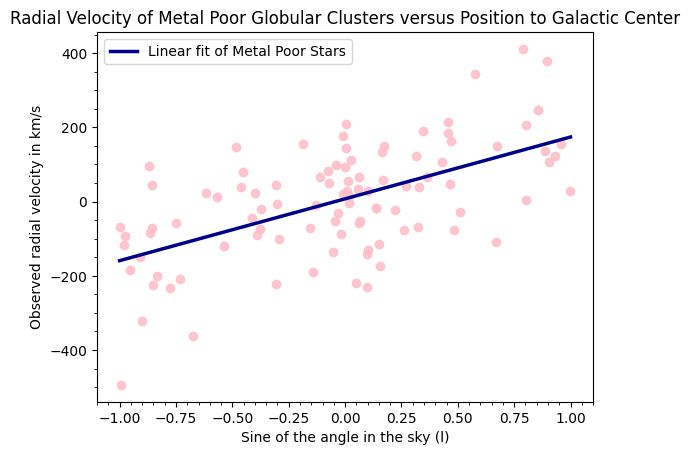

In [243]:
v_mp = (feh < -0.8) & (feh != -999) & (vr != -999)
l_mp = (feh < -0.8) & (feh != -999) & (vr != -999)

plt.ylabel("Observed radial velocity in km/s")
plt.xlabel("Sine of the angle in the sky (l)")

x = np.sin(np.deg2rad((L[l_mp])))
y = -vr[v_mp]

plt.scatter(x, y, color = 'pink', alpha = 0.9);

b, a = np.polyfit(x, y, deg=1)

print(b)
print(a)

# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(-1, 1, num=100)

# Plot regression line
plt.plot(xseq, a + b * xseq, color="darkblue", lw=2.5, label = "Linear fit of Metal Poor Stars")
plt.minorticks_on()
plt.legend()
plt.title("Radial Velocity of Metal Poor Globular Clusters versus Position to Galactic Center");

In [244]:
b * np.pi / 2 

np.float64(261.69607709391533)

In [245]:
vc_proj = -vr[v_mp] / np.sin(np.deg2rad(L[l_mp]))

vc = (np.pi / 2) * vc_proj

In [246]:
vr[v_mp] + vc_proj

residuals = -vr[v_mp] - (a + b * np.sin(np.deg2rad((L[l_mp]))))

residuals_sq = residuals ** 2
np.sum(residuals_sq)

np.float64(1447908.2176891372)

In [247]:
gcs_residuals = vr[v_mp] + (b * np.sin(np.deg2rad(L[l_mp])))

sigr = np.std(gcs_residuals)

sigr3d = np.sqrt(3) * sigr

print(sigr, sigr3d)

121.550704028768 210.53199507359318


#### Problem 2

In [248]:
datasite='http://burro.case.edu/Academics/Astr222/HW/HW2/'
datafile_o='flynn.dat'

In [249]:
oort_limit=ascii.read(datasite+datafile_o,header_start=-2,data_start=0)
print(oort_limit.colnames)

['star', 'V', 'vr', 'MV']


In [250]:
star = oort_limit['star']
V = oort_limit['V']
vrad = oort_limit['vr']
MV = oort_limit['MV']

In [251]:
oort_limit['d'] = 10** ((V - MV + 5) / 5)
d = oort_limit['d']

oort_limit['Z'] = d - 30
Z = oort_limit['Z']

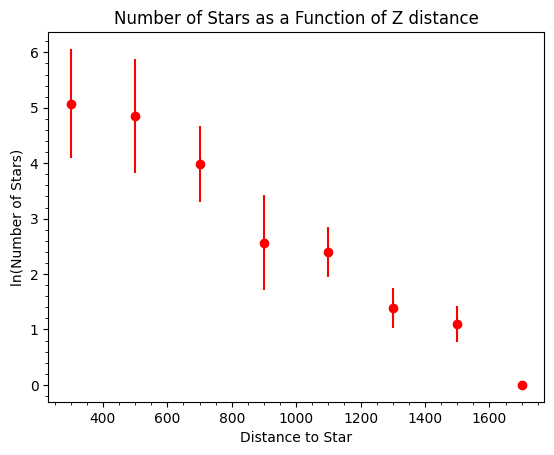

In [252]:
from scipy.stats import binned_statistic


# set up bins in x going from 200 to 4000 in steps of 200
binvals = np.arange(200,2000,200) 
# work out how many points are in each bin (bin_num) as well as 
# the average and standard deviation of the y values in the bins (bin_avg, bin_std)
bin_num, bin_edges, bin_idx = binned_statistic(Z, np.log(star), statistic='count', bins=binvals)
bin_avg, bin_edges, bin_idx = binned_statistic(Z, np.log(star), statistic='mean', bins=binvals)
bin_std, bin_edges, bin_idx = binned_statistic(Z, np.log(star), statistic='std',  bins=binvals)

# this bit of python magic works out the center of each bin
bin_cent = 0.5*(bin_edges[1:]+bin_edges[:-1])

# plot the data
plt.scatter(bin_cent,np.log(bin_num),s=20)
plt.xlabel('Distance to Star')
plt.ylabel('ln(Number of Stars)')

# plot the mean and standard deviation as red points and errorbars
plt.errorbar(bin_cent, np.log(bin_num), yerr=bin_std, fmt='o', color='red')

plt.minorticks_on()
plt.title("Number of Stars as a Function of Z distance");

In [253]:
np.min(np.log(star))

np.float64(0.0)

    slope = -0.004 +/- 0.000
intercept = 6.377 +/- 0.254
  scatter = 127.712
269.79964123865335


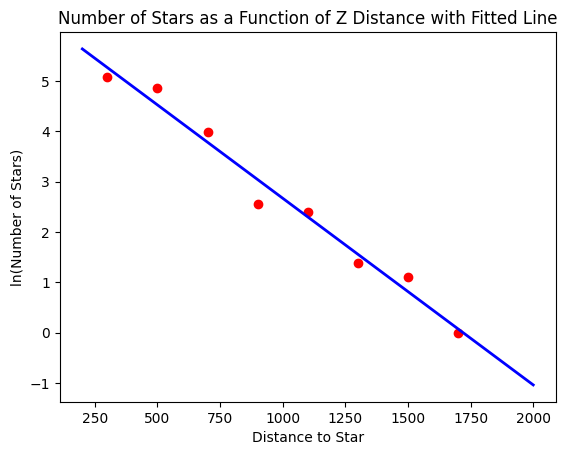

In [254]:
coeff,cov=np.polyfit(bin_cent,np.log(bin_num),1,cov=True)
coeff_err = np.sqrt(np.diag(cov))
print('    slope = {:.3f} +/- {:.3f}'.format(coeff[0],coeff_err[0]))
print('intercept = {:.3f} +/- {:.3f}'.format(coeff[1],coeff_err[1]))
polynomial=np.poly1d(coeff)
print('  scatter = {:.3f}'.format(np.std(star-polynomial(Z))))

print(-1/coeff[0])
# plot the data
plt.scatter(bin_cent,np.log(bin_num), color = 'red')
plt.xlabel('Distance to Star')
plt.ylabel('ln(Number of Stars)')
plt.title("Number of Stars as a Function of Z Distance with Fitted Line")

# overplot your fit
xfit=np.linspace(200,2000,200)
plt.plot(xfit,polynomial(xfit),color='blue',lw=2)

In [255]:
z_o = -1/coeff[0]
print(z_o)

269.79964123865335


In [256]:
avg_vr = np.average(vrad)

print(avg_vr)

6.843537414965986


In [257]:
z_vel = vrad - avg_vr

In [258]:
print(len(Z))
print(len(z_vel))

441
441


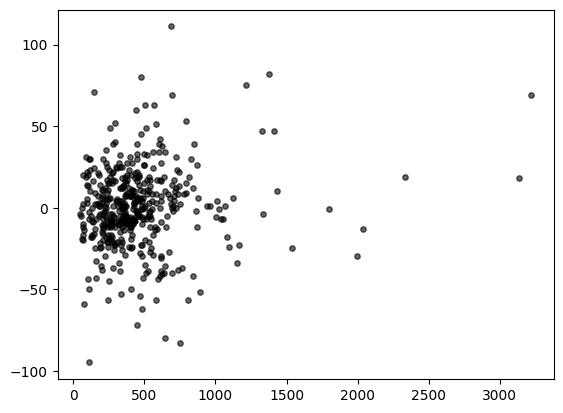

In [259]:
plt.scatter(Z, z_vel, c='k', s=15, alpha=.6, label='Stars')

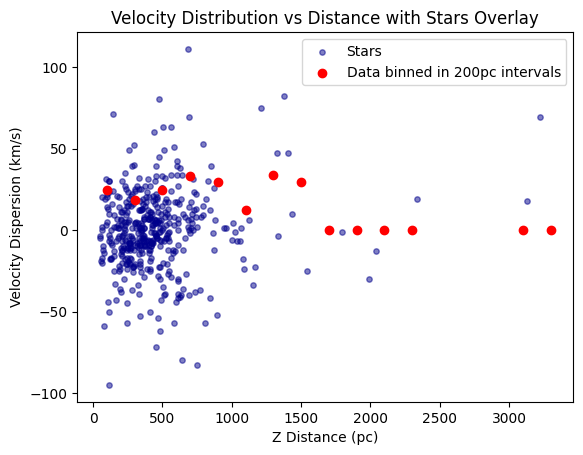

In [274]:
binvals = np.arange(0,4000,200)

# work out how many points are in each bin (bin_num) as well as 
# the average and standard deviation of the y values in the bins (bin_avg, bin_std)
bin_num, bin_edges, bin_idx = binned_statistic(Z, z_vel, statistic='count', bins=binvals)
bin_avg, bin_edges, bin_idx = binned_statistic(Z, z_vel, statistic='mean', bins=binvals)
bin_std, bin_edges, bin_idx = binned_statistic(Z, z_vel, statistic='std',  bins=binvals)

# this bit of python magic works out the center of each bin
bin_cent = 0.5*(bin_edges[1:]+bin_edges[:-1])

plt.scatter(Z, z_vel, c='darkblue', s=15, alpha=.5, label='Stars')

# plot the mean and standard deviation as red points and errorbars
plt.scatter(bin_cent, bin_std, color = 'red', label='Data binned in 200pc intervals')

plt.xlabel("Z Distance (pc)")
plt.ylabel("Velocity Dispersion (km/s)")
plt.legend()
plt.title("Velocity Distribution vs Distance with Stars Overlay")
disp = np.average(bin_std[bin_std>0])

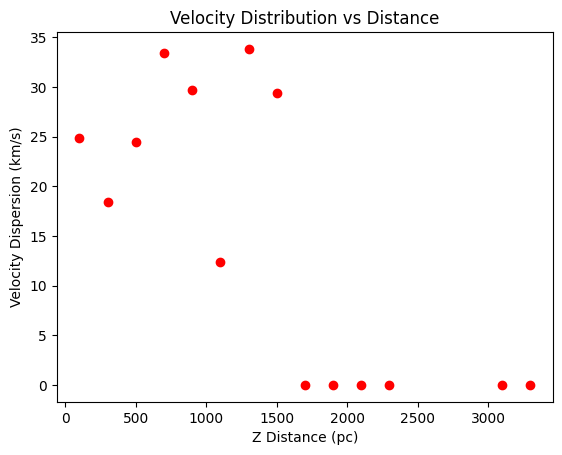

In [275]:

# plot the mean and standard deviation as red points and errorbars
plt.scatter(bin_cent, bin_std, color = 'red')

plt.xlabel("Z Distance (pc)")
plt.ylabel("Velocity Dispersion (km/s)")
plt.title("Velocity Distribution vs Distance")
disp = np.average(bin_std[bin_std>0])

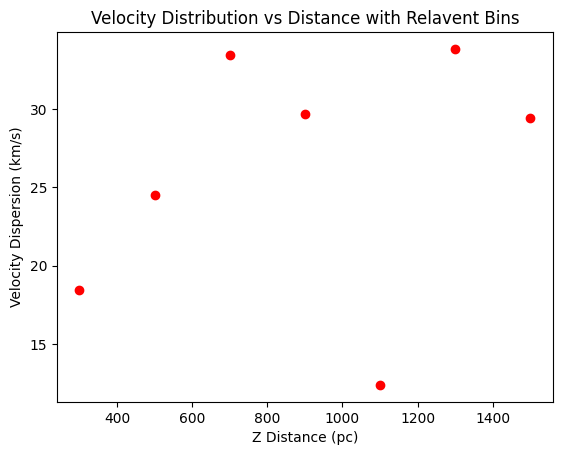

In [271]:
binvals = np.arange(200,1800,200)

# work out how many points are in each bin (bin_num) as well as 
# the average and standard deviation of the y values in the bins (bin_avg, bin_std)
bin_num, bin_edges, bin_idx = binned_statistic(Z, z_vel, statistic='count', bins=binvals)
bin_avg, bin_edges, bin_idx = binned_statistic(Z, z_vel, statistic='mean', bins=binvals)
bin_std, bin_edges, bin_idx = binned_statistic(Z, z_vel, statistic='std',  bins=binvals)

# this bit of python magic works out the center of each bin
bin_cent = 0.5*(bin_edges[1:]+bin_edges[:-1])

# plot the mean and standard deviation as red points and errorbars
plt.scatter(bin_cent, bin_std, color = 'red')

plt.xlabel("Z Distance (pc)")
plt.ylabel("Velocity Dispersion (km/s)")
plt.title("Velocity Distribution vs Distance with Relavent Bins")
disp = np.average(bin_std[bin_std>0])

In [269]:
np.average(bin_std)

np.float64(25.942199288054656)